In [1]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ml import *
#!conda install torchvision -y
from torchvision.datasets import ImageFolder
from torchvision import transforms

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Préparation des données

Notre dataset contient environ 4400 images répartis en 8 classes de monuments. Nous avons aussi divisé les données en 3 parties:
- les données d'entraînement `training set`,
- les données de validation `validation set`
et enfin
- les données de test `test set`

Les images de notre dataset ne sont pas tous de la même taille.

In [2]:
data_dir = "data/"
print(os.listdir(data_dir))

classes = os.listdir(data_dir + "/train")
print(classes)

['valid', '.DS_Store', 'test', 'train']
['moulin-rouge', 'palais-de-l-elysee', 'pont-neuf', 'place-de-la-concorde', 'jardin-des-tuileries', 'hotel-de-ville', 'arc-de-triomphe', 'musee-d-orsay']


In [3]:
moulin_rouge_files = os.listdir(data_dir+"/train/moulin-rouge")
print("Nombre de données d'entraînement de la classe moulin-rouge:", len(moulin_rouge_files))

pont_neuf_files = os.listdir(data_dir+"/train/pont-neuf")
print("Nombre de données d'entraînement de la classe pont-neuf:", len(pont_neuf_files))

Nombre de données d'entraînement de la classe moulin-rouge: 391
Nombre de données d'entraînement de la classe pont-neuf: 487


In [4]:
train_dataset = ImageFolder(data_dir+'/train', transform=transforms.Compose([
                                                                        transforms.ToTensor(),
                                                                        transforms.Resize((8, 8))
                                                                        ]))

valid_dataset = ImageFolder(data_dir+'/valid', transform=transforms.Compose([
                                                                        transforms.ToTensor(),
                                                                        transforms.Resize((8, 8))
                                                                        ]))

In [5]:
print(train_dataset.classes)

['arc-de-triomphe', 'hotel-de-ville', 'jardin-des-tuileries', 'moulin-rouge', 'musee-d-orsay', 'palais-de-l-elysee', 'place-de-la-concorde', 'pont-neuf']


In [6]:
def showImg(tensor, label):
    fig, ax = plt.subplots()
    ax.imshow(tensor.permute(1, 2, 0))
    ax.set_title(f'Label: {train_dataset.classes[label]} ({str(label)})')
    ax.set_xlabel(f'{tensor.shape}')
    ax.set_xticks([])
    ax.set_yticks([]);
    return ax

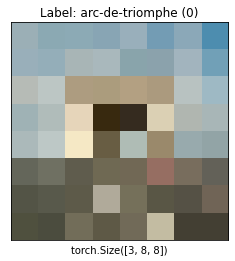

In [7]:
img, label = train_dataset[0]

showImg(img, label);

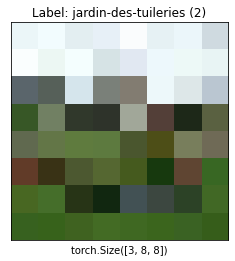

In [8]:
showImg(*train_dataset[1000]);

In [9]:
#dataset[3416][0]
X_train = np.array([np.array(train_dataset[i][0]).flatten() for i in range(len(train_dataset))])

X_valid = np.array([np.array(valid_dataset[i][0]) for i in range(len(valid_dataset))])


In [10]:
Y_train = []

for output in range(len(train_dataset)):
    if train_dataset[output][1] == 0:
        Y_train.append([1, 0, 0, 0, 0, 0, 0, 0])
    elif train_dataset[output][1] == 1:
        Y_train.append([0, 1, 0, 0, 0, 0, 0, 0])
    elif train_dataset[output][1] == 2:
        Y_train.append([0, 0, 1, 0, 0, 0, 0, 0])
    elif train_dataset[output][1] == 3:
        Y_train.append([0, 0, 0, 1, 0, 0, 0, 0])
    elif train_dataset[output][1] == 4:
        Y_train.append([0, 0, 0, 0, 1, 0, 0, 0])
    elif train_dataset[output][1] == 5:
        Y_train.append([0, 0, 0, 0, 0, 1, 0, 0])
    elif train_dataset[output][1] == 6:
        Y_train.append([0, 0, 0, 0, 0, 0, 1, 0])
    elif train_dataset[output][1] == 7:
        Y_train.append([0, 0, 0, 0, 0, 0, 0, 1])

Y_train = np.array(Y_train)

print(Y_train)

Y_valid = []

for output in range(len(valid_dataset)):
    if valid_dataset[output][1] == 0:
        Y_valid.append([1, 0, 0, 0, 0, 0, 0, 0])
    elif valid_dataset[output][1] == 1:
        Y_valid.append([0, 1, 0, 0, 0, 0, 0, 0])
    elif valid_dataset[output][1] == 2:
        Y_valid.append([0, 0, 1, 0, 0, 0, 0, 0])
    elif valid_dataset[output][1] == 3:
        Y_valid.append([0, 0, 0, 1, 0, 0, 0, 0])
    elif valid_dataset[output][1] == 4:
        Y_valid.append([0, 0, 0, 0, 1, 0, 0, 0])
    elif valid_dataset[output][1] == 5:
        Y_valid.append([0, 0, 0, 0, 0, 1, 0, 0])
    elif valid_dataset[output][1] == 6:
        Y_valid.append([0, 0, 0, 0, 0, 0, 1, 0])
    elif valid_dataset[output][1] == 7:
        Y_valid.append([0, 0, 0, 0, 0, 0, 0, 1])

Y_valid = np.array(Y_valid)
print(Y_valid)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [11]:
print(len(X_train))
print(len(Y_train))

3417
3417


## MLP

In [ ]:
input_dim = [len(X_train[0]), 8]

p_model, len_output_layer = create_mlp_model(input_dim)
test_before = predict_mlp_model_classification(p_model, X_train[0], len_output_layer)

print("Before training:", test_before)

train_classification_stochastic_gradient_backpropagation_mlp_model(p_model, X_train.flatten(), Y_train.flatten(), epochs=10)

test_after = predict_mlp_model_classification(p_model, X_train[0], len_output_layer)

print("After training:", test_after)

## Linear

In [ ]:
# A faire

## Import dataset

In [1]:
import numpy as np
import os
from PIL import Image
from ml import *

In [2]:
IMG_SIZE = (8, 8)
PATH = os.path.join("data/")
TRAIN = os.path.join(PATH, "train")
classes = os.listdir(TRAIN)

In [3]:
classes

['moulin-rouge',
 'palais-de-l-elysee',
 'pont-neuf',
 'place-de-la-concorde',
 'jardin-des-tuileries',
 'hotel-de-ville',
 'arc-de-triomphe',
 'musee-d-orsay']

In [4]:
def import_images_and_assign_labels(folder, label, X, Y):
    for file in os.listdir(folder):
        image_path = os.path.join(folder, file)
        im = Image.open(image_path)
        im = im.resize((8, 8))
        im = im.convert("RGB")
        im_arr = np.array(im)
        im_arr = np.reshape(im_arr, (8 * 8 * 3))
        X.append(im_arr)
        Y.append(label)

In [5]:
len(os.listdir(os.path.join(PATH, "train", "pont-neuf")))

487

In [6]:
def import_dataset():
    X_train, y_train, X_valid, y_valid = [], [], [], []
    labels = np.identity(len(os.listdir(TRAIN))-1)

    for set_type in ["train", "valid"]:
        for cl, lab in zip(classes, labels):
            if set_type == "train":
                X_set, y_set = X_train, y_train
            else:
                X_set, y_set = X_valid, y_valid
            import_images_and_assign_labels(
                os.path.join(PATH, set_type, cl),
                lab,
                X_set,
                y_set
            )                
    
    return (np.array(X_train) / 255.0, np.array(y_train)), \
           (np.array(X_valid) / 255.0, np.array(y_valid))

In [7]:
(X_train, y_train), (X_valid, y_valid) = import_dataset()

In [8]:
train_ex = X_train[0].tolist()

In [ ]:
input_dim = [len(X_train[0]), 8]

p_model, len_output_layer = create_mlp_model(input_dim)
test_before = predict_mlp_model_classification(p_model, train_ex, len_output_layer)

print("Before training:", test_before)

train_classification_stochastic_gradient_backpropagation_mlp_model(p_model, X_train, y_train.flatten(), epochs=100)

test_after = predict_mlp_model_classification(p_model, train_ex, len_output_layer)

print("After training:", test_after)

destroy_mlp_model(p_model)